# - Problem Definition and Understanding

In a highly competitive market with increasing demand, a leading Superstore Giant seeks data-driven insights to optimize its business strategies. The goal is to identify high-performing and underperforming products, regions, categories, and customer segments. This analysis will help determine which areas to prioritize for growth and which to reconsider or optimize to maximize profitability and efficiency.


# - Let's Explore our Data!

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chardet

# Set pandas display options
pd.set_option('display.max_columns', None)
%matplotlib inline

# ------------------------
# Detect file encoding
# ------------------------
file_path = r'D:\Radwa\Study\DEPI\final project\Superstore.csv'  
# Detect encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    print(f"Detected Encoding: {result['encoding']}")
try:
    df = pd.read_csv(file_path, encoding=result['encoding'])
    print("\nFile read successfully!")
except Exception as e:
    print(f"\nError reading file: {e}")

Detected Encoding: Windows-1252

File read successfully!


In [2]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156   9/11/2013  12/11/2013    Second Class    CG-12520   
1       2  CA-2013-152156   9/11/2013  12/11/2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11/10/2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11/10/2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9994
Number of columns: 21


In [4]:
df.info()                            #Infromation about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.isnull().sum()   #Checking for NULL values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.drop(['Row ID'],axis=1,inplace=True)
#As the 'Row ID' is unique for each row maybe this is preventing from detecting duplicate rows.Let us drop the 'Row ID' column.

In [7]:
df[df.duplicated()]

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
3406  US-2011-150119  23-04-2011  27-04-2011  Standard Class    LB-16795   

       Customer Name      Segment        Country      City State  Postal Code  \
3406  Laurel Beltran  Home Office  United States  Columbus  Ohio        43229   

     Region       Product ID   Category Sub-Category  \
3406   East  FUR-CH-10002965  Furniture       Chairs   

                                           Product Name    Sales  Quantity  \
3406  Global Leather Highback Executive Chair with P...  281.372         2   

      Discount   Profit  
3406       0.3 -12.0588

In [8]:
df[df.duplicated(keep=False)]  #After dropping the 'Row ID' column, we see that there are duplicate rows. we will drop them.

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
3405  US-2011-150119  23-04-2011  27-04-2011  Standard Class    LB-16795   
3406  US-2011-150119  23-04-2011  27-04-2011  Standard Class    LB-16795   

       Customer Name      Segment        Country      City State  Postal Code  \
3405  Laurel Beltran  Home Office  United States  Columbus  Ohio        43229   
3406  Laurel Beltran  Home Office  United States  Columbus  Ohio        43229   

     Region       Product ID   Category Sub-Category  \
3405   East  FUR-CH-10002965  Furniture       Chairs   
3406   East  FUR-CH-10002965  Furniture       Chairs   

                                           Product Name    Sales  Quantity  \
3405  Global Leather Highback Executive Chair with P...  281.372         2   
3406  Global Leather Highback Executive Chair with P...  281.372         2   

      Discount   Profit  
3405       0.3 -12.0588  
3406       0.3 -12.0588

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# Get the unique values in the "Ship Mode" column
unique_ship_modes = df['Ship Mode'].unique()
# Print the unique values
print(unique_ship_modes)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [11]:
# Get the unique values in the "Segment" column
unique_segment = df['Segment'].unique()
# Print the unique values
print(unique_segment)

['Consumer' 'Corporate' 'Home Office']


In [12]:
# Get the unique values in the "Country" column
unique_country = df['Country'].unique()
# Print the unique values
print(unique_country)

['United States']


In [13]:
# Get the unique values in the "State" column
unique_state = df['State'].unique()
# Print the unique values
print(unique_state)

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [74]:
# Get the unique values in the "Region" column
unique_region = df['Region'].unique()
# Print the unique values
print(unique_region)

['South' 'West' 'Central' 'East']


In [75]:
# Get the unique values in the "Category" column
unique_category = df['Category'].unique()
# Print the unique values
print(unique_category)

['Furniture' 'Office Supplies' 'Technology']


In [76]:
# Get the unique values in the "Sub-Category" column
unique_Sub_Category = df['Sub-Category'].unique()
# Print the unique values
print(unique_Sub_Category)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [162]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9993
Number of columns: 20


In [14]:
# Replace "-" with "/" in "Order Date" and "Ship Date" columns
df['Order Date'] = df['Order Date'].str.replace(r'[-. ]', '/', regex=True)
df['Ship Date'] = df['Ship Date'].str.replace(r'[-. ]', '/', regex=True)

# Save the changes
df.to_csv('Superstore_utf8.csv', index=False)

In [15]:
df.head()

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0  CA-2013-152156   9/11/2013  12/11/2013    Second Class    CG-12520   
1  CA-2013-152156   9/11/2013  12/11/2013    Second Class    CG-12520   
2  CA-2013-138688  13/06/2013  17/06/2013    Second Class    DV-13045   
3  US-2012-108966  11/10/2012  18/10/2012  Standard Class    SO-20335   
4  US-2012-108966  11/10/2012  18/10/2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [16]:
df.columns = df.columns.str.strip()
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

In [17]:
df['Diff b/w order and ship date'] = df['Ship Date'] - df['Order Date']

In [18]:
df['Diff b/w order and ship date'].value_counts()

Diff b/w order and ship date
4 days    2770
5 days    2175
2 days    1332
6 days    1201
3 days    1007
7 days     621
0 days     519
1 days     368
Name: count, dtype: int64

In [19]:
df['Diff b/w order and ship date']=df['Diff b/w order and ship date'].dt.days
#dropping 'days' word from the values

In [20]:
df['Diff b/w order and ship date'].value_counts()

Diff b/w order and ship date
4    2770
5    2175
2    1332
6    1201
3    1007
7     621
0     519
1     368
Name: count, dtype: int64

In [21]:
#Converting 'Order Date' and 'Ship Date' columns to [day,month,year] columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

In [22]:
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Day of Week'] = df['Ship Date'].dt.dayofweek

In [23]:
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)

In [24]:
df.info()                         #Infromation about the pre-processed dataset

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      9993 non-null   object 
 1   Ship Mode                     9993 non-null   object 
 2   Customer ID                   9993 non-null   object 
 3   Customer Name                 9993 non-null   object 
 4   Segment                       9993 non-null   object 
 5   Country                       9993 non-null   object 
 6   City                          9993 non-null   object 
 7   State                         9993 non-null   object 
 8   Postal Code                   9993 non-null   int64  
 9   Region                        9993 non-null   object 
 10  Product ID                    9993 non-null   object 
 11  Category                      9993 non-null   object 
 12  Sub-Category                  9993 non-null   object 
 13  Product 

In [25]:
# Convert numeric months to abbreviated month names
import calendar
df["Order Month"] = df["Order Month"].apply(lambda x: calendar.month_abbr[x])

--


**After we have a clear understanding of what the data is all about, the next step is to present it in the form of charts, making it easier to digest and visualize for better understanding.**

# - Now, let’s turn our data into insights!


# -- Customer Insights

1️⃣ Top 5 Customers by Number of Products Purchased

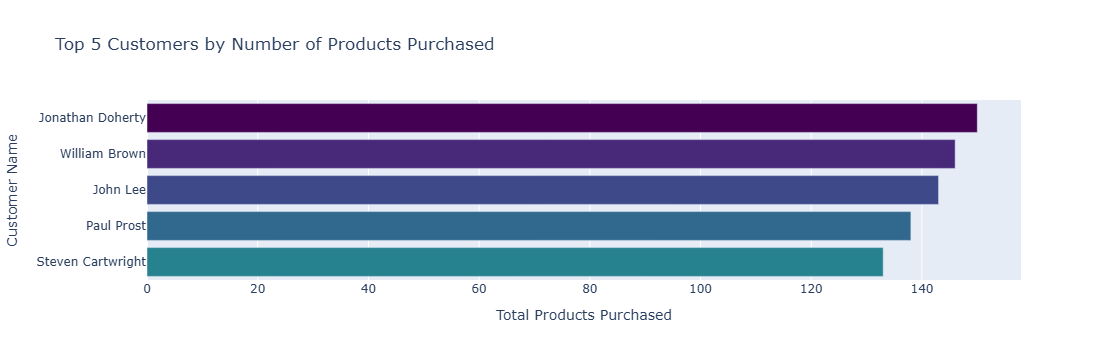

In [31]:
top_customers = df.groupby("Customer Name")["Quantity"].sum().sort_values(ascending=False).head(5)
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ["Customer Name", "Total Quantity"]

fig = px.bar(
    top_customers_df,
    x="Total Quantity",
    y="Customer Name",
    orientation='h',
    color="Customer Name",
    color_discrete_sequence=px.colors.sequential.Viridis,
    title="Top 5 Customers by Number of Products Purchased"
)

fig.update_layout(
    xaxis_title="Total Products Purchased",
    yaxis_title="Customer Name",
    showlegend=False,
    height=400
)

fig.show()


2️⃣ Customer with Highest Total Spending

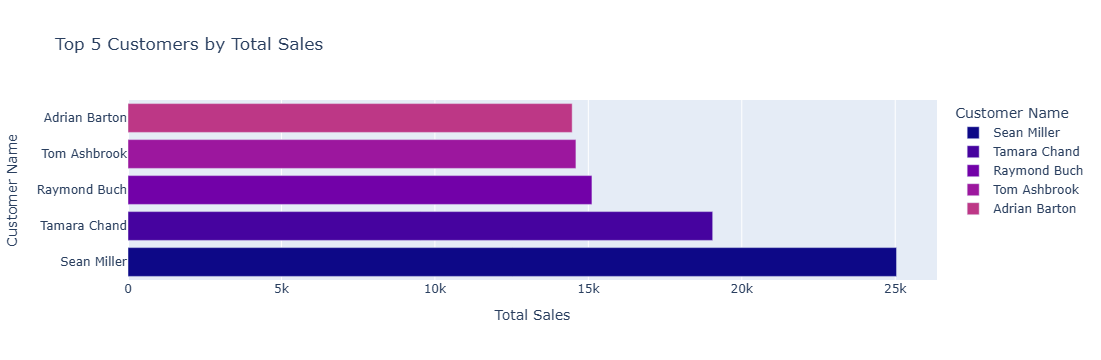

In [32]:
# Calculate the top 5 customers based on total sales
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(5)

# Create a bar chart using Plotly
fig = px.bar(
    top_customers_sales.reset_index(),
    x="Sales",
    y="Customer Name",
    orientation='h',
    color="Customer Name",
    title="Top 5 Customers by Total Sales",
    labels={"Sales": "Total Sales", "Customer Name": "Customer Name"},
    color_discrete_sequence=px.colors.sequential.Plasma
)

# Flip y-axis so the highest value is on top
fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()

3️⃣ Total Sales by Customer Segment

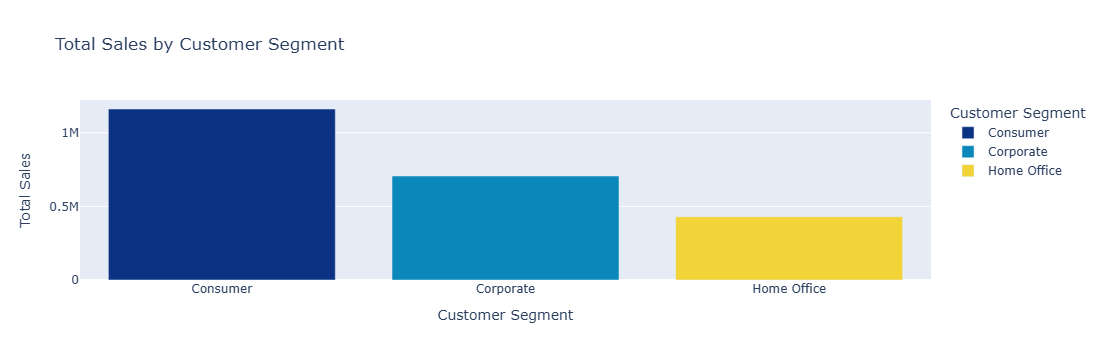

In [33]:
# Group by Segment and calculate total sales
segment_sales = df.groupby("Segment")["Sales"].sum().sort_values(ascending=False)

# Create a bar chart using Plotly
fig = px.bar(
    segment_sales.reset_index(),
    x="Segment",
    y="Sales",
    color="Segment",
    title="Total Sales by Customer Segment",
    labels={"Sales": "Total Sales", "Segment": "Customer Segment"},
    color_discrete_sequence=px.colors.diverging.Portland  # بديل لـ "coolwarm"
)

fig.show()


4️⃣ Segment with the Most Purchases

In [34]:
top_segment = df.groupby("Segment")["Quantity"].sum().idxmax()
print(f"The segment with the most purchases is: {top_segment}")


The segment with the most purchases is: Consumer


5️⃣ Average Order Value (AOV) for Each Customer Segment

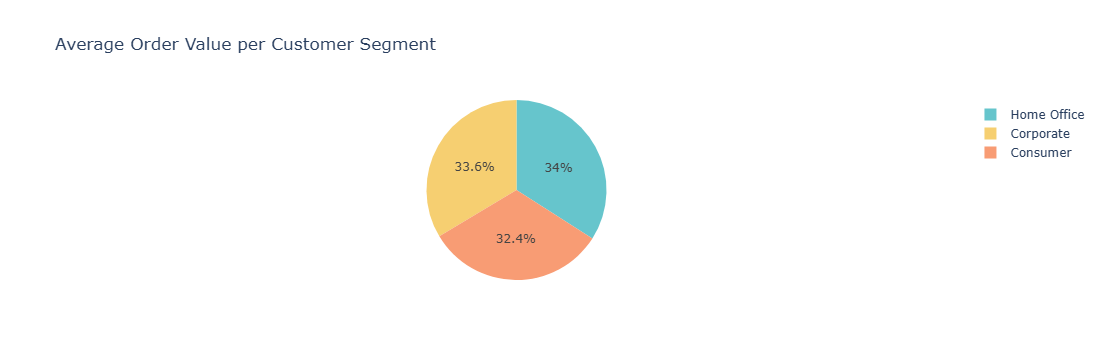

In [37]:
# Calculate Average Order Value (AOV) per Customer Segment
aov_per_segment = df.groupby("Segment").agg({"Sales": "sum", "Order ID": pd.Series.nunique})
aov_per_segment["AOV"] = aov_per_segment["Sales"] / aov_per_segment["Order ID"]
aov_per_segment = aov_per_segment["AOV"].sort_values(ascending=False).reset_index() # added reset_index()

# Visualization using Plotly
fig = px.pie(
    aov_per_segment,
    names="Segment",
    values="AOV",
    title="Average Order Value per Customer Segment",
    labels={"Segment": "Customer Segment", "AOV": "Average Order Value"},
    color="Segment",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

6️⃣ Number of Unique Customers per Region

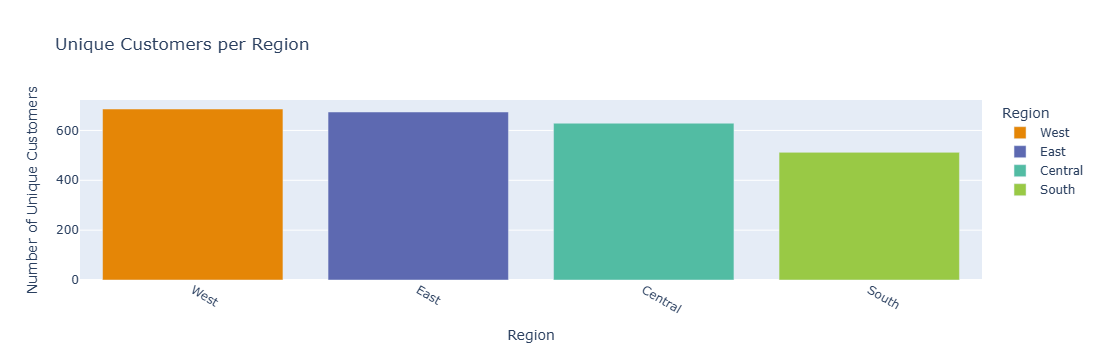

In [53]:
# Count Unique Customers per Region
unique_customers_per_region = df.groupby("Region")["Customer ID"].nunique().sort_values(ascending=False)

# Visualization using Plotly
fig = px.bar(
    unique_customers_per_region.reset_index(),
    x="Region",
    y="Customer ID",
    color="Region",
    title="Unique Customers per Region",
    labels={"Region": "Region", "Customer ID": "Number of Unique Customers"},
    color_discrete_sequence=px.colors.qualitative.Vivid 
)

fig.update_layout(xaxis_tickangle=30)  

fig.show()

# -- Product Insights

1️⃣ Top 10 Products by Money Spent (Sales Revenue)

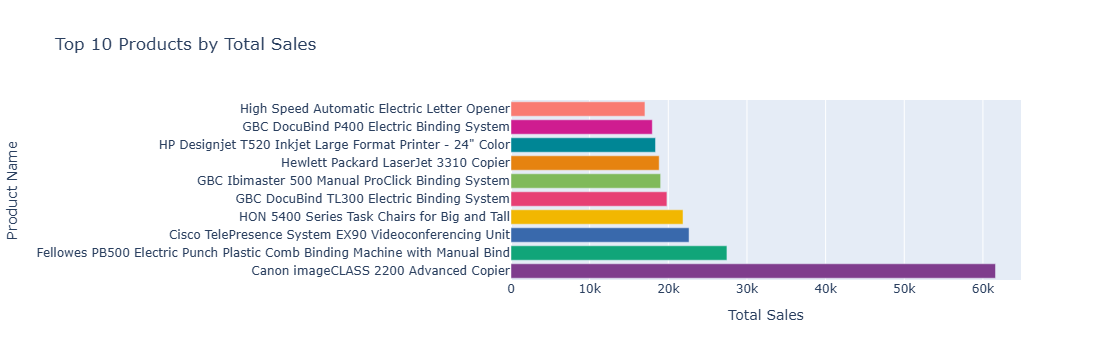

In [62]:
# Top 10 products by total sales
top_10_products_sales = df.groupby("Product Name")['Sales'].sum().nlargest(10)

# Visualization using Plotly
fig = px.bar(
    top_10_products_sales.reset_index(),
    x="Sales",
    y="Product Name",
    color="Product Name",
    title="Top 10 Products by Total Sales",
    labels={"Sales": "Total Sales", "Product Name": "Product Name"},
    color_discrete_sequence=px.colors.qualitative.Bold  
)
# Reverse y-axis to show highest at the top
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    showlegend=False  
)

fig.show()


2️⃣ Top 10 products by number of orders

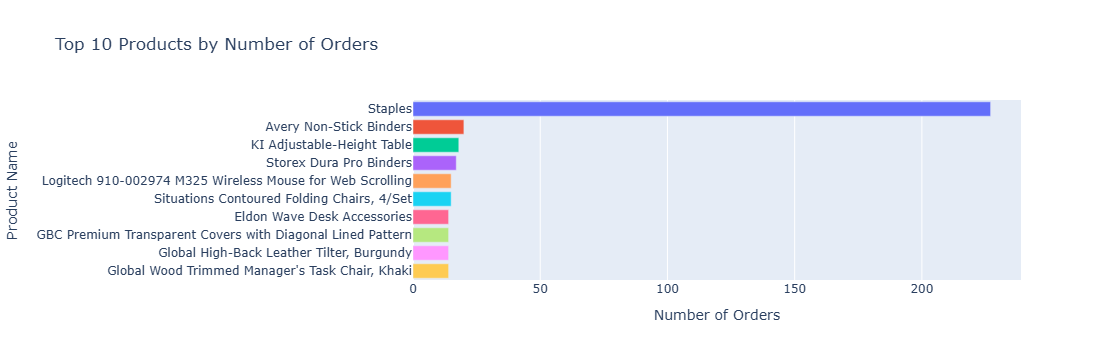

In [53]:
top_10_products_orders = df.groupby("Product Name")['Order ID'].count().nlargest(10).reset_index()

fig = px.bar(top_10_products_orders,
             x='Order ID', 
             y='Product Name',
             orientation='h',
             title="Top 10 Products by Number of Orders",  
             labels={'Order ID': 'Number of Orders', 'Product Name': 'Product Name'},
             color='Product Name',
             color_continuous_scale='autumn')

fig.update_layout(showlegend=False)
fig.show()

3️⃣ Subcategory with most sales

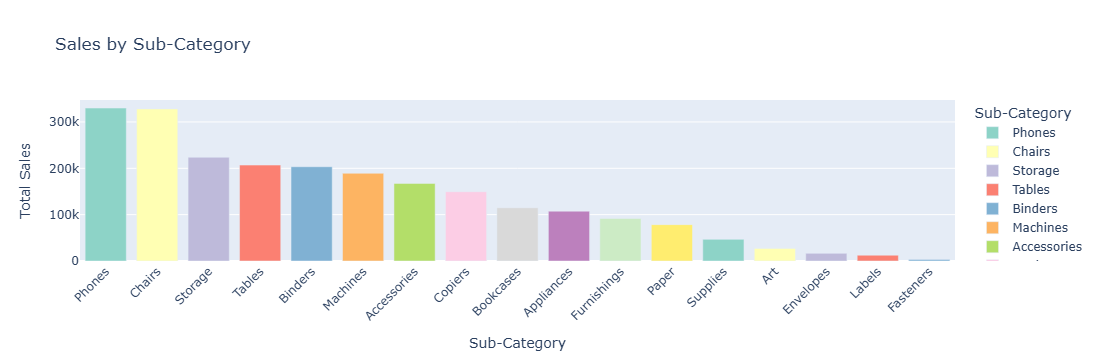

In [39]:
subcategory_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).reset_index()
fig = px.bar(
    subcategory_sales,
    x="Sub-Category",
    y="Sales",
    color="Sub-Category",
    color_discrete_sequence=px.colors.qualitative.Set3,
    title="Sales by Sub-Category"
)

fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Total Sales",
    xaxis_tickangle=-45
)

fig.show()

4️⃣ Average sales by product category

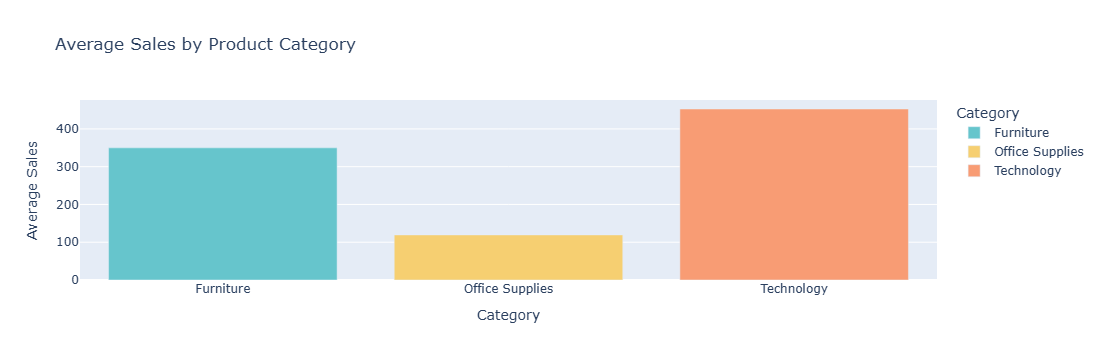

In [40]:
category_avg_sales = df.groupby("Category")["Sales"].mean().reset_index()

fig = px.bar(
    category_avg_sales,
    x="Category",
    y="Sales",
    color="Category",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Average Sales by Product Category"
)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Average Sales"
)

fig.show()

5️⃣ Least purchased products (by number of orders)

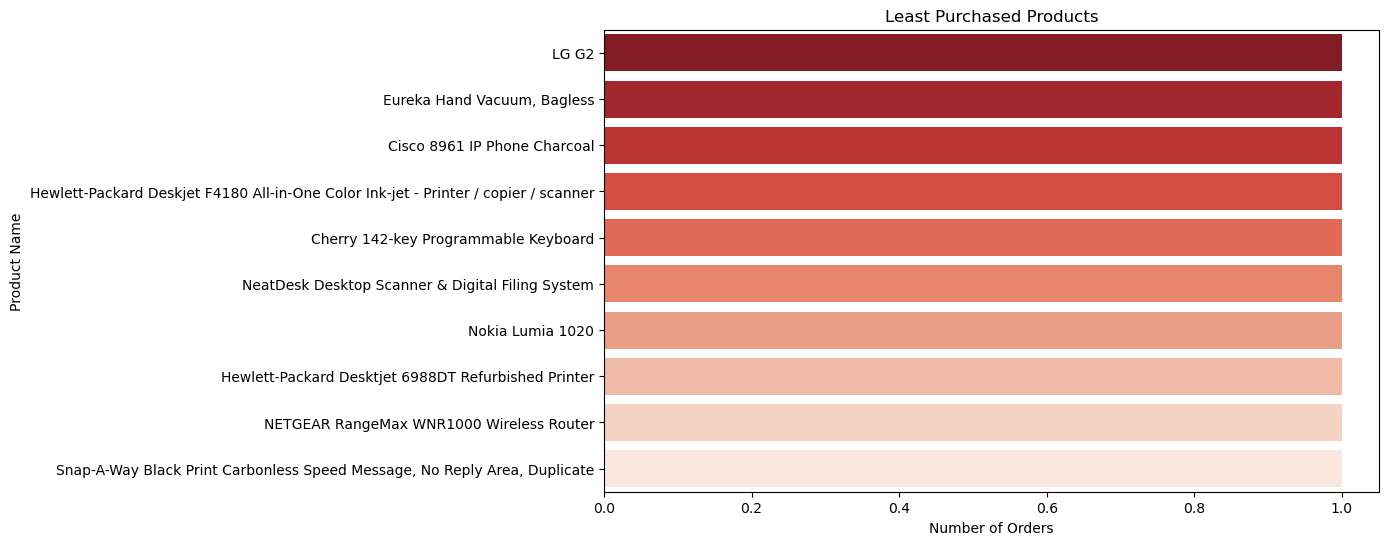

In [69]:
least_purchased_products = df["Product Name"].value_counts().nsmallest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=least_purchased_products.values, y=least_purchased_products.index, hue=least_purchased_products.index, legend=False, palette="Reds_r")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.title("Least Purchased Products")
plt.show()

6️⃣ Most profitable subcategories

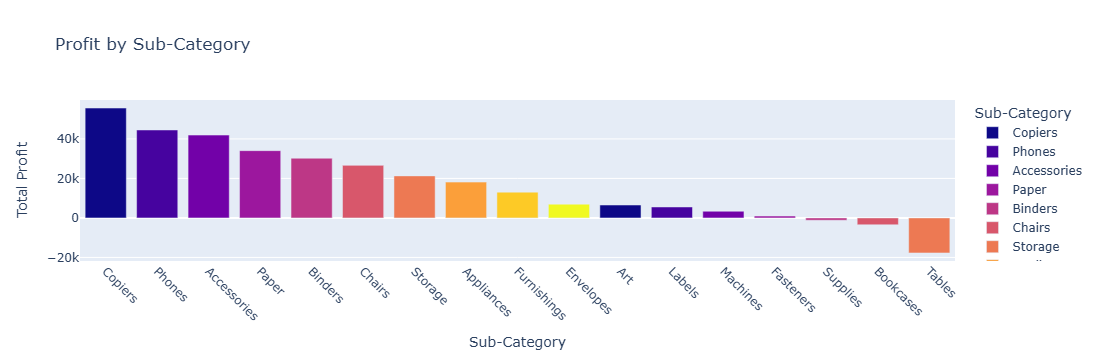

In [70]:
subcategory_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    subcategory_profit,
    x="Sub-Category",
    y="Profit",
    color="Sub-Category",
    color_discrete_sequence=px.colors.sequential.Plasma,
    title="Profit by Sub-Category"
)

fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Total Profit",
    xaxis_tickangle=45
)

fig.show()

7️⃣ Average discount by category

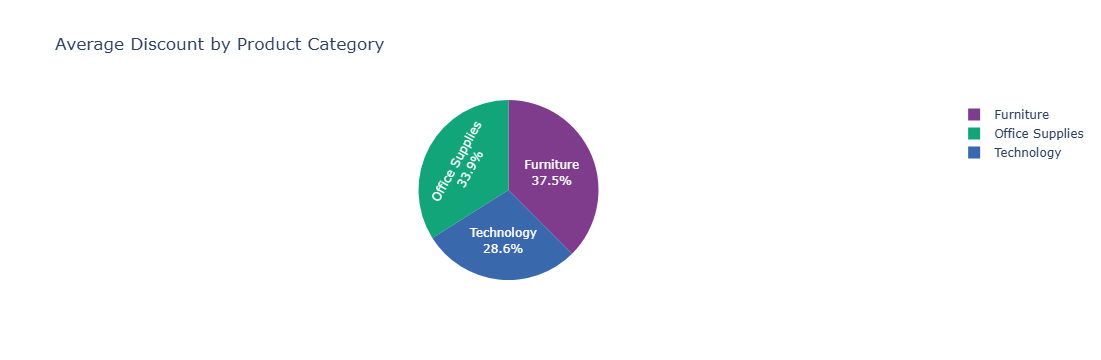

In [72]:
category_avg_discount = df.groupby("Category")["Discount"].mean().reset_index()

fig = px.pie(
    category_avg_discount,
    names="Category",
    values="Discount",
    title="Average Discount by Product Category",
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

8️⃣ Detect underperforming categories (low sales & low profit)

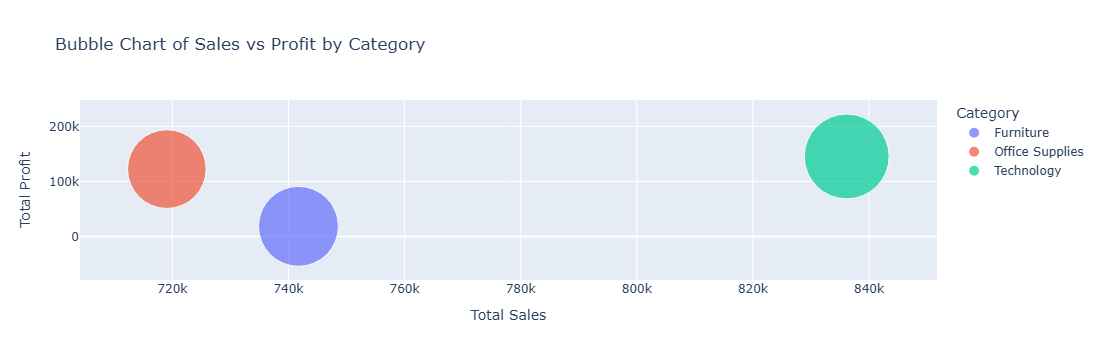

In [74]:
underperforming_categories = df.groupby("Category")[['Sales', 'Profit']].sum().reset_index()

# Bubble chart
fig = px.scatter(
    underperforming_categories,
    x="Sales",
    y="Profit",
    size="Sales",
    color="Category",
    hover_name="Category",
    title="Bubble Chart of Sales vs Profit by Category",
    size_max=60
)

fig.update_layout(
    xaxis_title="Total Sales",
    yaxis_title="Total Profit"
)

fig.show()

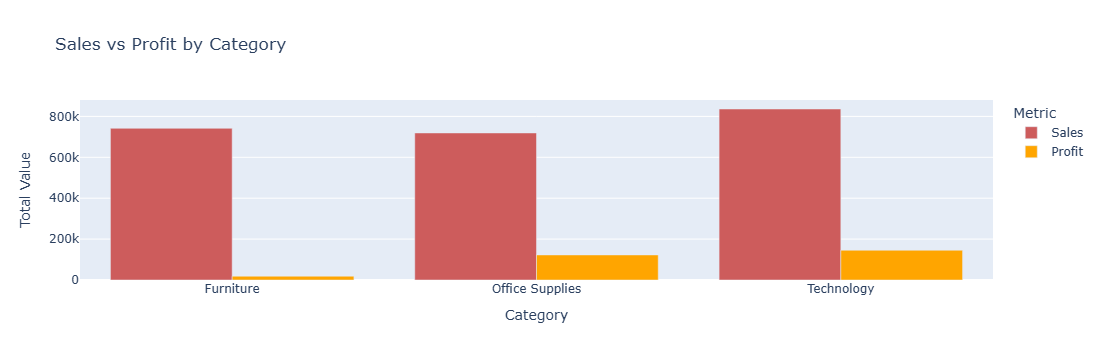

In [73]:
underperforming_categories = df.groupby("Category")[['Sales', 'Profit']].sum().reset_index()

melted_df = underperforming_categories.melt(id_vars="Category", value_vars=["Sales", "Profit"], var_name="Metric", value_name="Value")

fig = px.bar(
    melted_df,
    x="Category",
    y="Value",
    color="Metric",
    barmode="group",
    title="Sales vs Profit by Category",
    color_discrete_map={"Sales": "indianred", "Profit": "orange"}
)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Total Value",
    legend_title="Metric"
)

fig.show()

# -- Sales Insights

1️⃣ Region with the Highest Sales

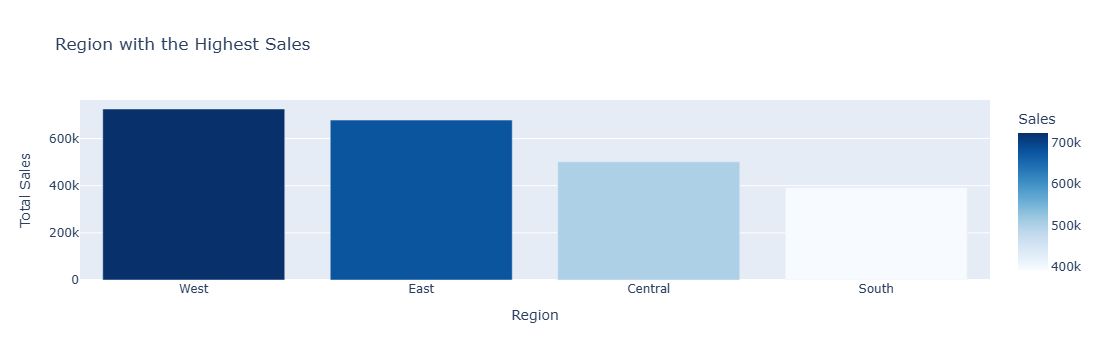

In [42]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False).reset_index()

fig = px.bar(
    region_sales,
    x="Region",
    y="Sales",
    title="Region with the Highest Sales",
    color="Sales",
    color_continuous_scale="Blues" 
)

fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Total Sales"
)

fig.show()

2️⃣ Sales Trend Over Time

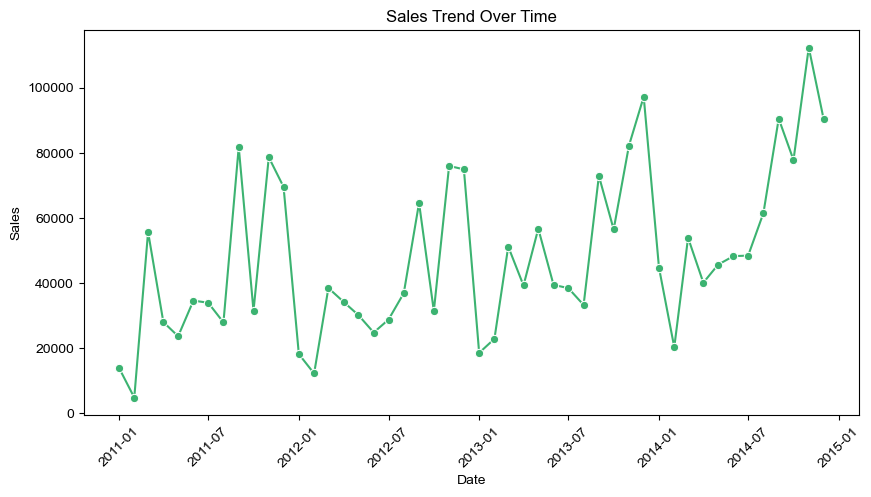

In [188]:
time_sales = df.groupby(["Order Year", "Order Month"])["Sales"].sum().reset_index()
time_sales["Date"] = pd.to_datetime(time_sales["Order Year"].astype(str) + "-" + time_sales["Order Month"].astype(str))

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_sales, x="Date", y="Sales", marker="o", color="mediumseagreen")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()

3️⃣ Top Ten State by Product Sold 

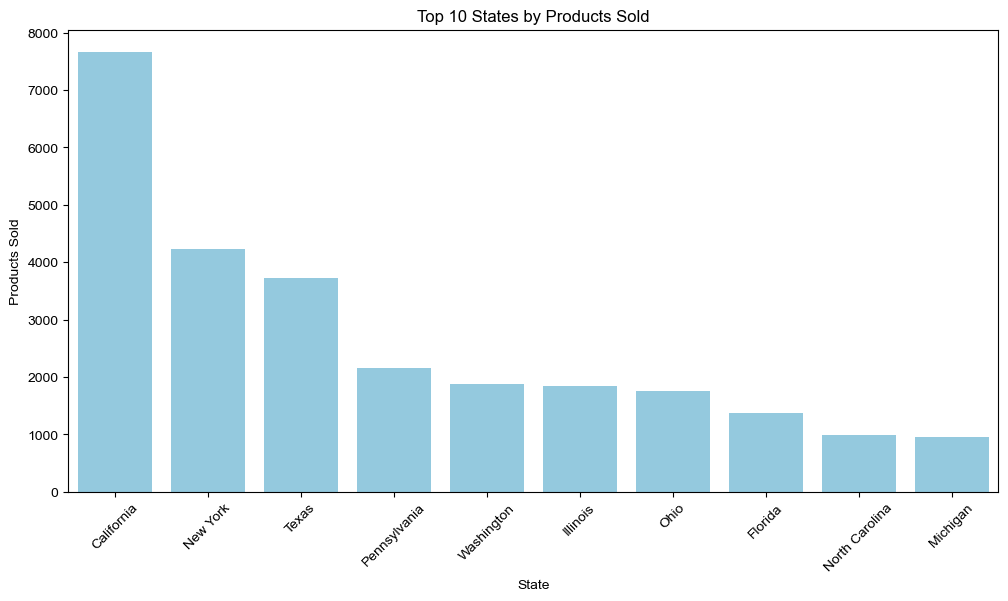

In [216]:
# 1. Group products sold by state
state_products_sold = df.groupby("State")["Quantity"].sum().sort_values(ascending=False)

# 2. Select the top 10 states based on products sold
top_state_products_sold = state_products_sold.head(10)

plt.figure(figsize=(12, 6))

# 3. Create a vertical bar plot with a different color
sns.barplot(x=top_state_products_sold.index, y=top_state_products_sold.values, color="skyblue")

plt.xlabel("State")
plt.ylabel("Products Sold")
plt.title("Top 10 States by Products Sold")

plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()

4️⃣ Top 10 Cities by Sales

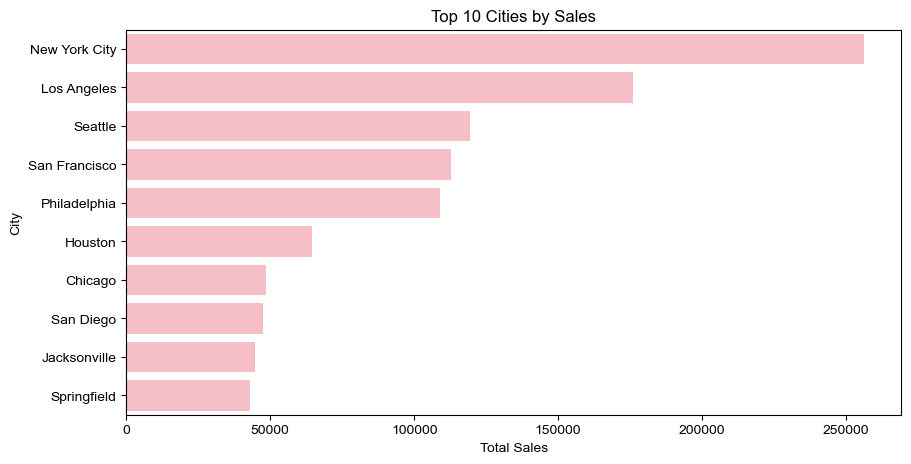

In [203]:
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, color="lightpink")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.title("Top 10 Cities by Sales")
plt.show()

5️⃣ States Generating the Most Profit

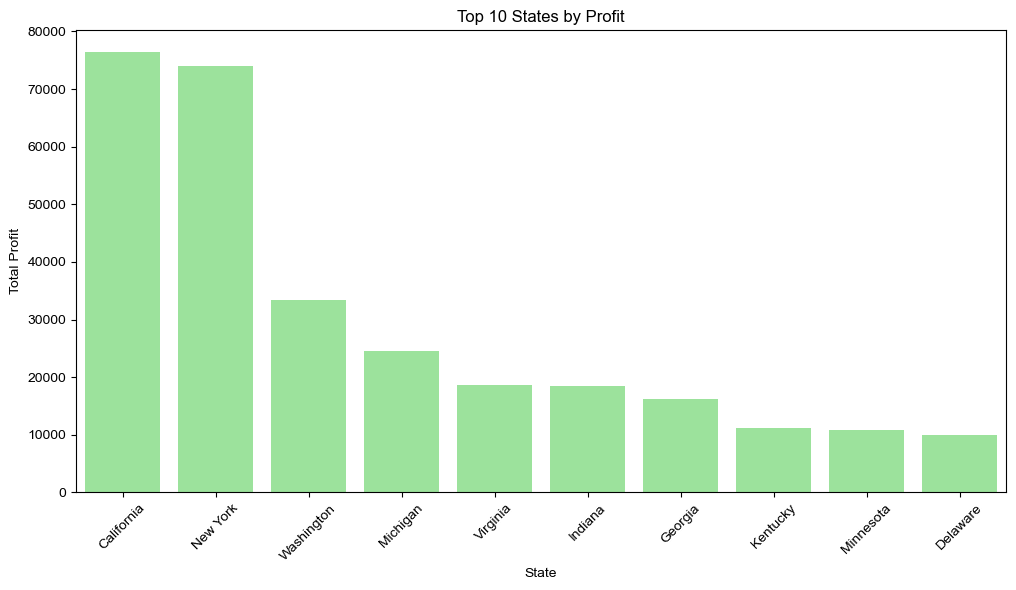

In [218]:
# 1. Group profits by state and sort in descending order
state_profit = df.groupby("State")["Profit"].sum().sort_values(ascending=False)

# 2. Select the top 10 states based on profit
top_state_profit = state_profit.head(10)

plt.figure(figsize=(12, 6))

# 3. Create a vertical bar plot to visualize the profit for each state
sns.barplot(x=top_state_profit.index, y=top_state_profit.values, color="lightgreen")

plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Top 10 States by Profit")

plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()

6️⃣ States & Cities with Consistently Low Sales or Profit

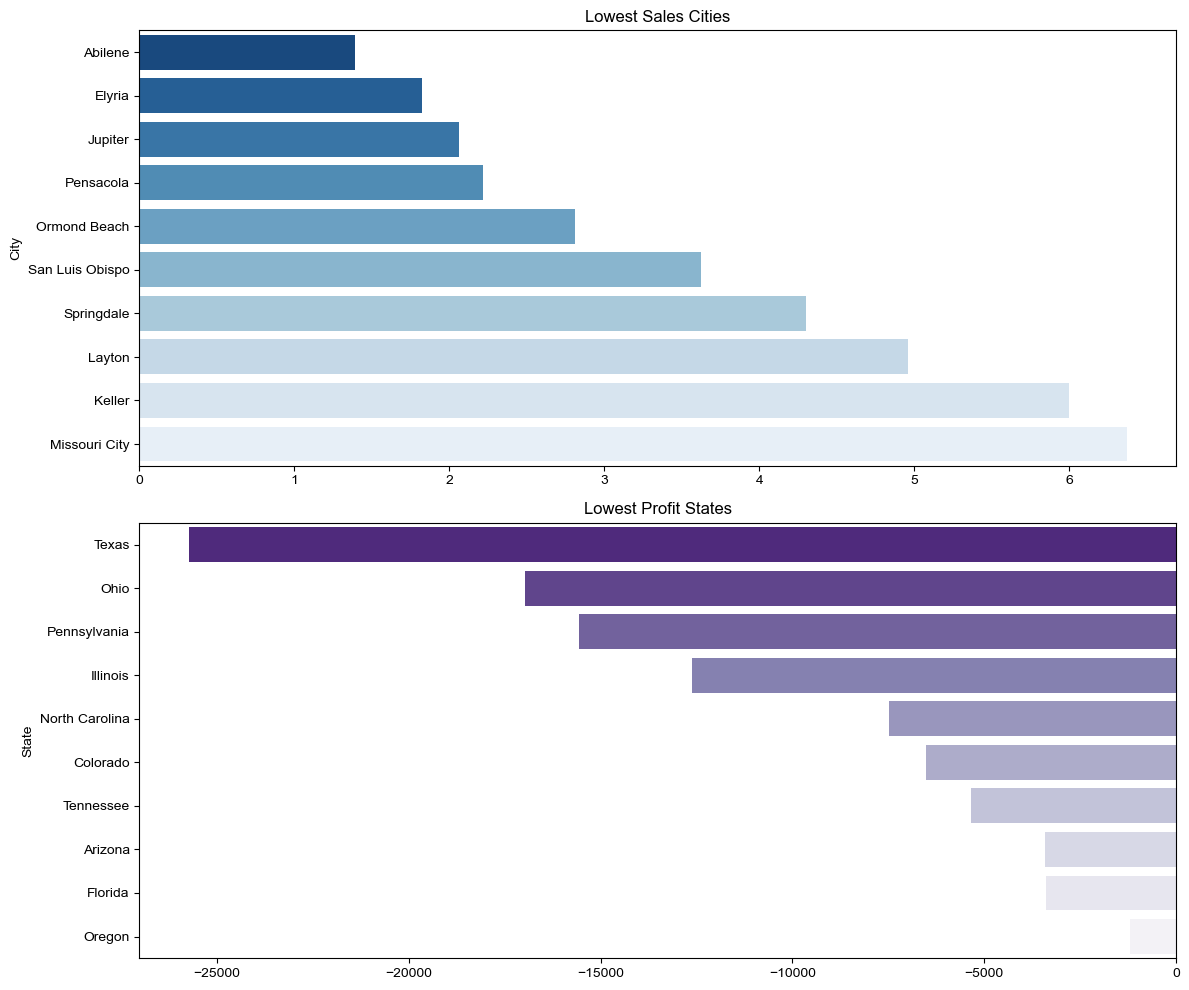

In [225]:
# 1. Group cities by sales and sort by smallest sales (low sales cities)
low_sales_cities = df.groupby("City")["Sales"].sum().nsmallest(10)

# 2. Group states by profit and sort by smallest profit (low profit states)
low_profit_states = df.groupby("State")["Profit"].sum().nsmallest(10)

# 3. Set up the figure and axes for two subplots (one for sales, one for profit)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 4. Create a bar plot for the lowest sales cities with gradient color from light to dark
sns.barplot(y=low_sales_cities.index, x=low_sales_cities.values, hue=low_sales_cities.index, palette="Blues_r", ax=axes[0], legend=False)
axes[0].set_title("Lowest Sales Cities")

# 5. Create a bar plot for the lowest profit states with gradient color from light to dark
sns.barplot(y=low_profit_states.index, x=low_profit_states.values, hue=low_profit_states.index, palette="Purples_r", ax=axes[1], legend=False)
axes[1].set_title("Lowest Profit States")

# 6. Adjust layout to avoid overlap and make the chart cleaner
plt.tight_layout()

# 7. Show the plots
plt.show()


# -- Shipping and Logistics

1️⃣ Most & Least Used Shipping Mode

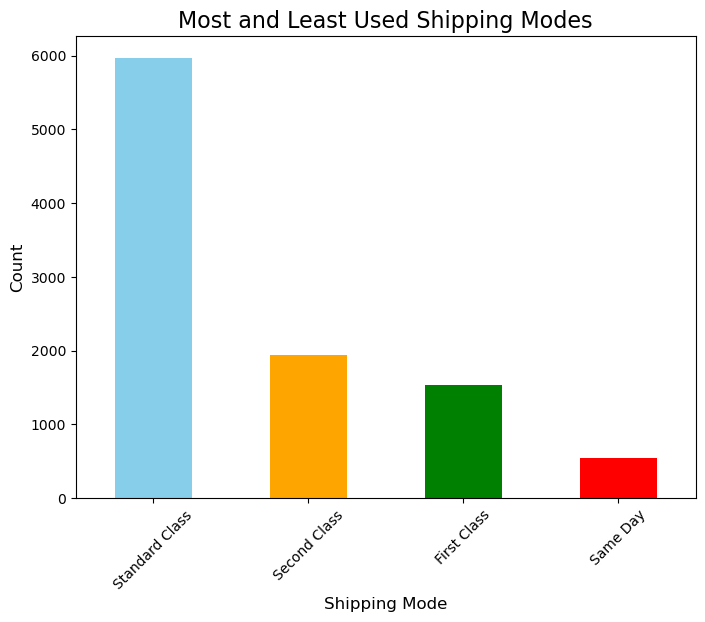

Most used shipping mode: Standard Class
Least used shipping mode: Same Day


In [91]:
# Count occurrences of each shipping mode
shipping_counts = df['Ship Mode'].value_counts()

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
shipping_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Most and Least Used Shipping Modes', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Create shipping_mode_counts
shipping_mode_counts = df['Ship Mode'].value_counts()

# Print the most and least used shipping modes
print("Most used shipping mode:", shipping_mode_counts.idxmax())
print("Least used shipping mode:", shipping_mode_counts.idxmin())

2️⃣ Delivery Trend for Each Shipping Mode Over Time

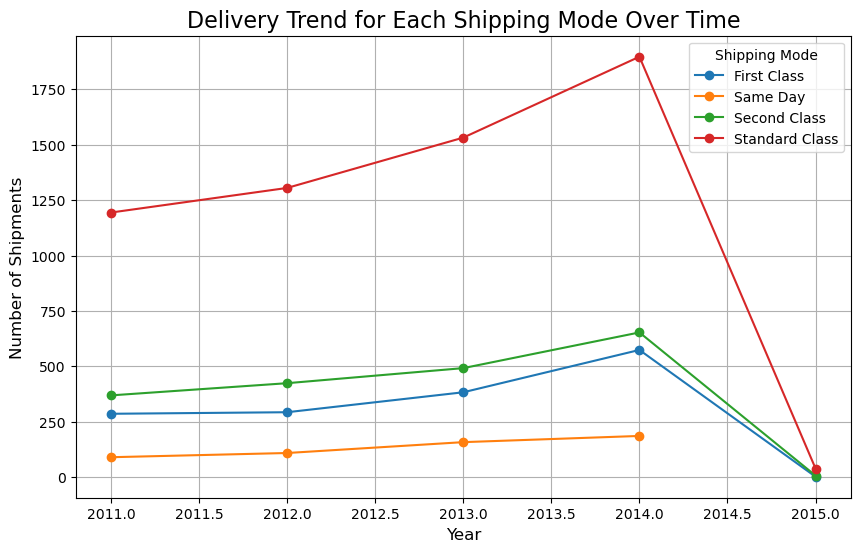

In [84]:
# Group by shipping mode and ship year
shipping_trend = df.groupby(['Ship Year', 'Ship Mode']).size().unstack()

# Plot delivery trend
shipping_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Delivery Trend for Each Shipping Mode Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.legend(title='Shipping Mode')
plt.grid(True)
plt.show()

# Create shipping_mode_counts
shipping_mode_counts = df['Ship Mode'].value_counts()


3️⃣ Impact of Shipping Mode on Profit Margins

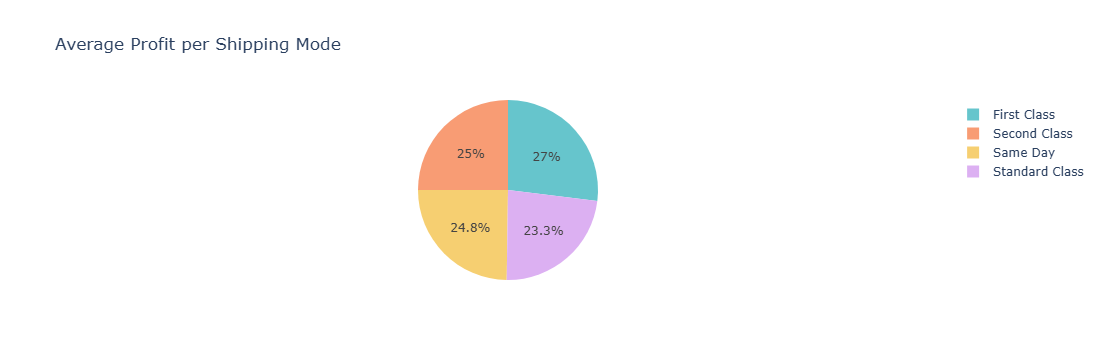

In [45]:
avg_profit = df.groupby("Ship Mode")["Profit"].mean().reset_index()

fig = px.pie(
    avg_profit,
    names="Ship Mode",
    values="Profit",
    title="Average Profit per Shipping Mode",
    labels={"Ship Mode": "Shipping Mode", "Profit": "Average Profit"},
    color="Ship Mode",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

4️⃣ Most Commonly Used Shipping Mode by Region

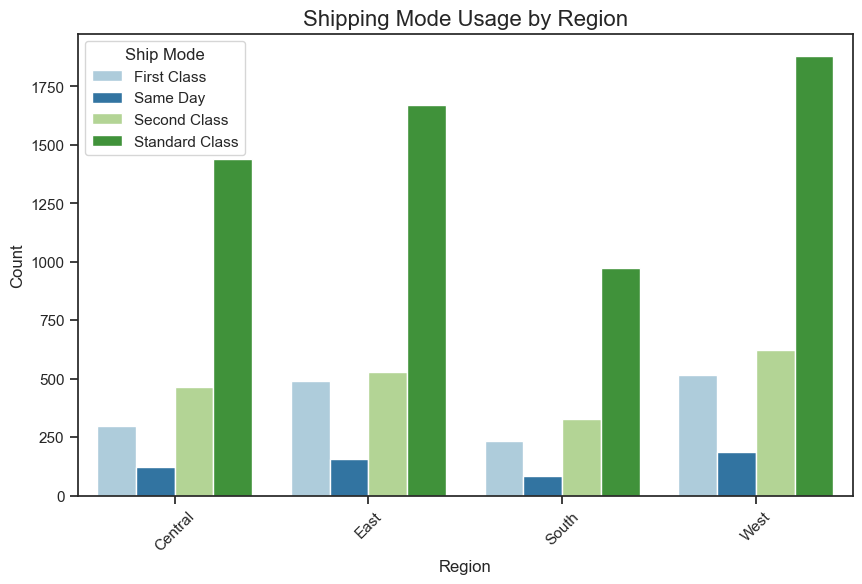

In [114]:
# Group data by region and shipping mode
region_shipping = df.groupby(['Region', 'Ship Mode']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=region_shipping, x='Region', y='Count', hue='Ship Mode', palette="Paired")
plt.title("Shipping Mode Usage by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Ship Mode")
plt.show()


# -- Time-Based Insights

1️⃣ Peak sales months for each region

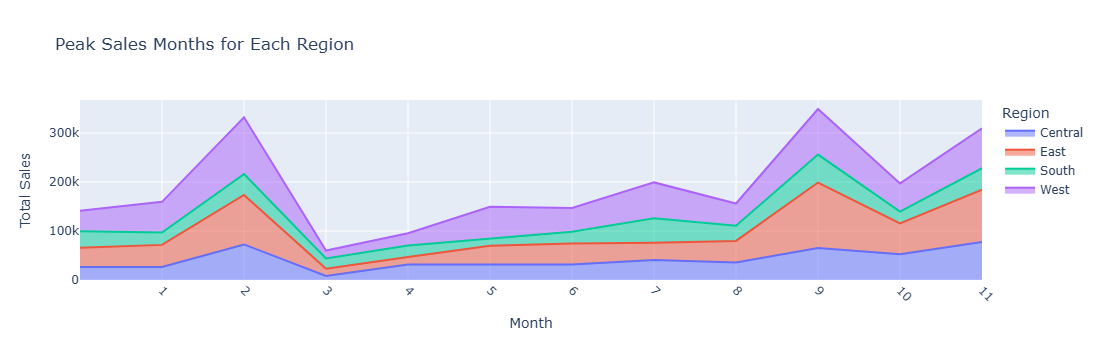

In [56]:
# Group sales data by Region and Order Month, summing the total sales
monthly_sales = df.groupby(['Region', 'Order Month'])['Sales'].sum().reset_index()

# Create an area plot for sales trends across different regions using plotly.express
fig = px.area(
    monthly_sales,
    x='Order Month',
    y='Sales',
    color='Region',
    title='Peak Sales Months for Each Region',
    labels={'Order Month': 'Month', 'Sales': 'Total Sales'}
)

# Customize x-axis ticks
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=[str(i) for i in range(1, 13)],
        tickangle=45
    )
)

# Show the plot
fig.show()

2️⃣ Sales variation by day of the week

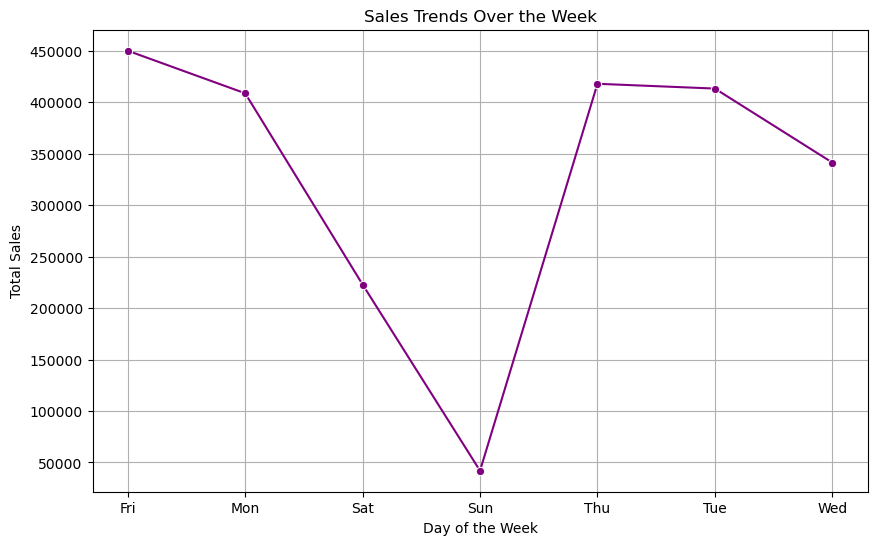

In [94]:

df["Order Day of Week"] = df["Order Day of Week"].map(lambda x: calendar.day_abbr[x])



sales_by_day = df.groupby("Order Day of Week")["Sales"].sum().reset_index()



plt.figure(figsize=(10, 6))

sns.lineplot(data=sales_by_day, x="Order Day of Week", y="Sales", marker="o", color="purple")

plt.title("Sales Trends Over the Week")

plt.xlabel("Day of the Week")

plt.ylabel("Total Sales")

plt.grid()

plt.show()


3️⃣ Seasonal trends in sales and profit

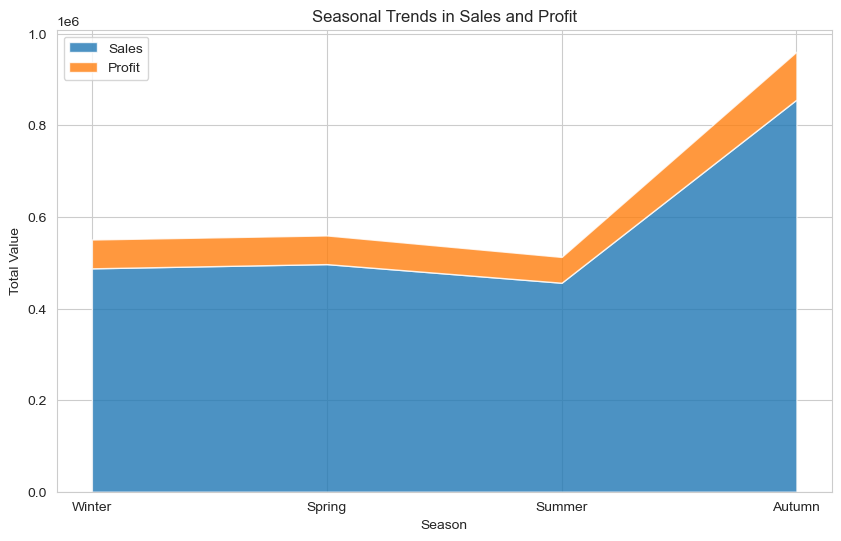

In [364]:
def get_season(month):
    if month in ["Dec", "Jan", "Feb"]:
        return 'Winter'
    elif month in ["Mar", "Apr", "May"]:
        return 'Spring'
    elif month in ["Jun", "Jul", "Aug"]:
        return 'Summer'
    else:
        return 'Autumn'
        

# Load the dataset (Ensure df is already defined before running this code)
df['Season'] = df['Order Month'].apply(get_season)

# Group by Season and sum Sales & Profit
seasonal_sales_profit = df.groupby("Season")[["Sales", "Profit"]].sum().reset_index()

# Set season order (ensuring correct chronological order)
season_order = ["Winter", "Spring", "Summer", "Autumn"]
seasonal_sales_profit["Season"] = pd.Categorical(
    seasonal_sales_profit["Season"], 
    categories=season_order, 
    ordered=True
)
seasonal_sales_profit = seasonal_sales_profit.sort_values("Season")

# Plot stacked area chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.stackplot(seasonal_sales_profit["Season"], 
              seasonal_sales_profit["Sales"], 
              seasonal_sales_profit["Profit"], 
              labels=["Sales", "Profit"], 
              colors=["#1f77b4", "#ff7f0e"], alpha=0.8)

plt.xlabel("Season")
plt.ylabel("Total Value")
plt.title("Seasonal Trends in Sales and Profit")
plt.legend()
plt.show()


# -- Additional Insights

1️⃣ The impact of different regions on sales performance.

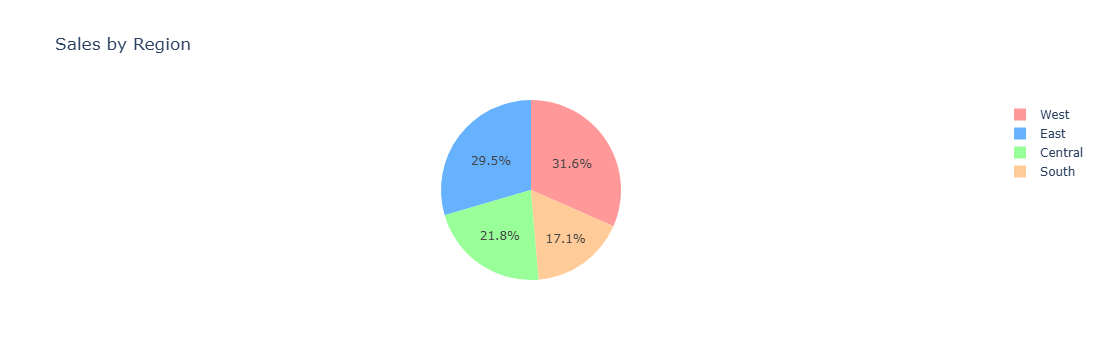

In [48]:
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'] 
fig = px.pie(
    region_sales,
    names="Region",
    values="Sales",
    title="Sales by Region",
    labels={"Region": "Region", "Sales": "Sales"},
    color="Region",
    color_discrete_sequence=custom_colors 
)

fig.show()

2️⃣ The percentage of orders that come from repeat customers.

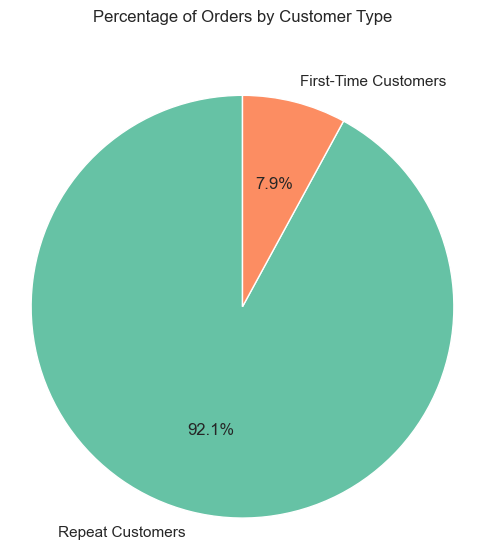

In [145]:
# Calculate order counts
repeat_orders = len(repeat_customers)
first_time_orders = len(first_time_customers)

# Create a pie chart
labels = ['Repeat Customers', 'First-Time Customers']
sizes = [repeat_orders, first_time_orders]
colors = sns.color_palette('Set2', n_colors=2)  # Using seaborn's Set2 palette

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Orders by Customer Type', y=1.1)  # Adjusted title position
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

In [28]:
!pip install dash dash-bootstrap-components plotly


In [ ]:
# Overview Dashboard using Dash
import dash
from dash import dcc, html
import plotly.express as px

# Assume df is already read above
df['Order Period'] = pd.to_datetime(df['Order Year'].astype(str) + '-' + df['Order Month'].astype(str) + '-01')

# KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
profit_margin = total_profit / total_sales
avg_order_value = total_sales / total_orders
num_customers = df['Customer ID'].nunique()

app = dash.Dash(__name__)
app.title = "Superstore Dashboard - Overview"

# KPI Card Style (Horizontal layout with colors)
kpi_style = {
    'display': 'flex',
    'justifyContent': 'space-around',
    'flexWrap': 'wrap',
    'gap': '10px'
}

kpi_colors = ['#87CEEB', '#90EE90', '#FFD700', '#FFB6C1', '#D3D3D3', '#FFA07A']

kpi_cards = html.Div([
    html.Div([html.H4("Total Sales"), html.H2(f"${total_sales:,.0f}")],
             style={'backgroundColor': kpi_colors[0], 'padding': '15px', 'borderRadius': '10px', 'textAlign': 'center', 'flex': '1'}),
    html.Div([html.H4("Total Profit"), html.H2(f"${total_profit:,.0f}")],
             style={'backgroundColor': kpi_colors[1], 'padding': '15px', 'borderRadius': '10px', 'textAlign': 'center', 'flex': '1'}),
    html.Div([html.H4("Total Orders"), html.H2(f"{total_orders:,}")],
             style={'backgroundColor': kpi_colors[2], 'padding': '15px', 'borderRadius': '10px', 'textAlign': 'center', 'flex': '1'}),
    html.Div([html.H4("Profit Margin"), html.H2(f"{profit_margin:.2%}")],
             style={'backgroundColor': kpi_colors[3], 'padding': '15px', 'borderRadius': '10px', 'textAlign': 'center', 'flex': '1'}),
    html.Div([html.H4("Avg Order Value"), html.H2(f"${avg_order_value:,.0f}")],
             style={'backgroundColor': kpi_colors[4], 'padding': '15px', 'borderRadius': '10px', 'textAlign': 'center', 'flex': '1'}),
    html.Div([html.H4("# of Customers"), html.H2(f"{num_customers:,}")],
             style={'backgroundColor': kpi_colors[5], 'padding': '15px', 'borderRadius': '10px', 'textAlign': 'center', 'flex': '1'})
], style=kpi_style)


colors = ['#ADD8E6', '#90EE90']  # Baby blue, light green

# Line chart
time_df = df.groupby('Order Period')[['Sales', 'Profit']].sum().reset_index()
fig1 = px.area(time_df, x='Order Period', y=['Sales', 'Profit'],
               title='Sales & Profit Over Time',
               template='plotly_white', color_discrete_sequence=colors)


# Region Performance
region_data = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
fig2 = px.bar(region_data, x='Region', y=['Sales', 'Profit'], barmode='group',
              title='Sales & Profit by Region',
              template='plotly_white', color_discrete_sequence=colors)

# Segment Performance
segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
fig3 = px.bar(segment_data, x='Segment', y=['Sales', 'Profit'], barmode='group',
              title='Sales & Profit by Segment',
              template='plotly_white', color_discrete_sequence=colors)

# Layout
app.layout = html.Div([
    html.H1("📊 Superstore Overview Dashboard"),
    kpi_cards,
    html.Br(),
    html.Div([
        dcc.Graph(figure=fig1)
    ]),
    html.Br(),
    html.Div([
        html.Div([dcc.Graph(figure=fig2)], style={'width': '48%', 'display': 'inline-block'}),
        html.Div([dcc.Graph(figure=fig3)], style={'width': '48%', 'display': 'inline-block', 'float': 'right'})
    ], style={'display': 'flex', 'justifyContent': 'space-between'}),
], style={'padding': '20px', 'backgroundColor': '#F9F9F9'})

if __name__ == '__main__':
    app.run(debug=True)
